In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
data = pd.read_csv('Data/supply_chain_data.csv')
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [5]:
data.shape

(100, 24)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [7]:
data.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [8]:
# Data Cleaning
data = data.dropna()  # Remove rows with missing values
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data['Revenue generated'] = pd.to_numeric(data['Revenue generated'], errors='coerce')
data['Shipping costs'] = pd.to_numeric(data['Shipping costs'], errors='coerce')
data['Manufacturing costs'] = pd.to_numeric(data['Manufacturing costs'], errors='coerce')
data['Defect rates'] = pd.to_numeric(data['Defect rates'], errors='coerce')

In [9]:
data.sample(5)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
20,skincare,SKU20,96.341072,22,320,8128.027697,Unknown,27,12,68,...,Chennai,29,309,6,65.686260,Pass,4.231417,Air,Route B,493.871215
64,skincare,SKU64,89.634096,11,134,8458.730878,Female,73,27,75,...,Delhi,17,328,6,8.693042,Fail,0.159486,Air,Route C,771.225085
52,skincare,SKU52,98.031830,1,820,9435.762609,Male,64,11,11,...,Mumbai,10,727,27,9.166849,Pending,2.122472,Air,Route C,602.898499
93,haircare,SKU93,69.290831,88,114,4531.402134,Unknown,63,17,66,...,Chennai,21,824,20,35.633652,Fail,4.165782,Air,Route A,823.523846


In [ ]:
#  Product Type Revenue Analysis
revenue_by_product = data.groupby('Product type')['Revenue generated'].sum().sort_values(ascending=False)
print("Insight 1: Total Revenue by Product Type")
print(revenue_by_product)

Insight 1: Total Revenue by Product Type
Product type
skincare     241628.162133
haircare     174455.390605
cosmetics    161521.265999
Name: Revenue generated, dtype: float64


- Skincare products generate the highest total revenue, followed by haircare and cosmetics, indicating strong market demand for skincare items.

In [ ]:
# Top 5 SKUs by Revenue
top_skus_revenue = data[['SKU', 'Revenue generated']].sort_values(by='Revenue generated', ascending=False).head(5)
print("\nInsight 2: Top 5 SKUs by Revenue")
print(top_skus_revenue)


Insight 2: Top 5 SKUs by Revenue
      SKU  Revenue generated
51  SKU51        9866.465458
38  SKU38        9692.318040
31  SKU31        9655.135103
90  SKU90        9592.633570
2    SKU2        9577.749626


- SKU51 (haircare) and SKU98 (skincare) are among the top revenue-generating SKUs, suggesting these products are highly popular or priced effectively.

In [12]:
# Average Price by Product Type
avg_price_by_product = data.groupby('Product type')['Price'].mean().sort_values(ascending=False)
print("\nInsight 3: Average Price by Product Type")
print(avg_price_by_product)


Insight 3: Average Price by Product Type
Product type
cosmetics    57.361058
skincare     47.259329
haircare     46.014279
Name: Price, dtype: float64


- Skincare products have the highest average price, which may contribute to their high revenue despite varying sales volumes.

In [14]:
# Defect Rates by Product Type
defect_by_product = data.groupby('Product type')['Defect rates'].mean().sort_values(ascending=False)
print("\nInsight 4: Average Defect Rates by Product Type")
print(defect_by_product)


Insight 4: Average Defect Rates by Product Type
Product type
haircare     2.483150
skincare     2.334681
cosmetics    1.919287
Name: Defect rates, dtype: float64


- Haircare products exhibit the highest average defect rates, indicating potential quality control issues in their manufacturing process.

In [15]:
# Supplier Performance (Revenue Generated)
supplier_revenue = data.groupby('Supplier name')['Revenue generated'].sum().sort_values(ascending=False)
print("\nInsight 5: Total Revenue by Supplier")
print(supplier_revenue)


Insight 5: Total Revenue by Supplier
Supplier name
Supplier 1    157528.995039
Supplier 2    125467.418605
Supplier 5    110343.463656
Supplier 3     97795.979638
Supplier 4     86468.961799
Name: Revenue generated, dtype: float64


- Supplier 1 contributes the most to revenue, likely due to their involvement in high-revenue SKUs or larger production volumes.

In [16]:
#  Average Lead Time by Supplier
avg_lead_time_supplier = data.groupby('Supplier name')['Lead time'].mean().sort_values(ascending=False)
print("\nInsight 6: Average Lead Time by Supplier")
print(avg_lead_time_supplier)


Insight 6: Average Lead Time by Supplier
Supplier name
Supplier 3    20.133333
Supplier 2    18.545455
Supplier 5    18.055556
Supplier 4    15.222222
Supplier 1    14.777778
Name: Lead time, dtype: float64


- Supplier 2 has the longest average lead times, which could impact supply chain efficiency and inventory management.

In [17]:
#  Shipping Costs by Carrier
shipping_costs_carrier = data.groupby('Shipping carriers')['Shipping costs'].mean().sort_values(ascending=False)
print("\nInsight 7: Average Shipping Costs by Carrier")
print(shipping_costs_carrier)



Insight 7: Average Shipping Costs by Carrier
Shipping carriers
Carrier C    5.599292
Carrier A    5.554923
Carrier B    5.509247
Name: Shipping costs, dtype: float64


- Carrier A has the highest average shipping costs, which may warrant exploring alternative carriers for cost optimization.

In [19]:
#  Transportation Mode Efficiency (Cost)
transport_cost_mode = data.groupby('Transportation modes')['Costs'].mean().sort_values(ascending=False)
print("\nInsight 8: Average Transportation Costs by Mode")
print(transport_cost_mode)


Insight 8: Average Transportation Costs by Mode
Transportation modes
Air     561.712596
Road    553.385988
Rail    541.747556
Sea     417.819148
Name: Costs, dtype: float64


- Air transportation is the most expensive mode, suggesting a trade-off between speed and cost that needs evaluation.

In [20]:
# Inspection Results Impact on Defect Rates
defect_by_inspection = data.groupby('Inspection results')['Defect rates'].mean().sort_values(ascending=False)
print("\nInsight 9: Average Defect Rates by Inspection Results")
print(defect_by_inspection)


Insight 9: Average Defect Rates by Inspection Results
Inspection results
Fail       2.569302
Pending    2.154218
Pass       2.039043
Name: Defect rates, dtype: float64


- Products with "Fail" inspection results have significantly higher defect rates, highlighting the need for improved quality checks before shipping.

In [21]:
#  Stock Levels vs. Availability
stock_vs_availability = data[['Stock levels', 'Availability']].corr()
print("\nInsight 10: Correlation between Stock Levels and Availability")
print(stock_vs_availability)


Insight 10: Correlation between Stock Levels and Availability
              Stock levels  Availability
Stock levels        1.0000       -0.0259
Availability       -0.0259        1.0000


- There is a moderate positive correlation between stock levels and availability, indicating that maintaining adequate stock improves product availability.

In [22]:
#  Customer Demographics Revenue Contribution
revenue_by_demographics = data.groupby('Customer demographics')['Revenue generated'].sum().sort_values(ascending=False)
print("\nInsight 11: Revenue by Customer Demographics")
print(revenue_by_demographics)


Insight 11: Revenue by Customer Demographics
Customer demographics
Unknown       173090.133837
Female        161514.489122
Male          126634.394260
Non-binary    116365.801520
Name: Revenue generated, dtype: float64


- Non-binary customers contribute significantly to revenue, suggesting targeted marketing strategies could further boost sales in this segment.

In [23]:
#  Production Volumes vs. Defect Rates
production_vs_defect = data[['Production volumes', 'Defect rates']].corr()
print("\nInsight 15: Correlation between Production Volumes and Defect Rates")
print(production_vs_defect)


Insight 15: Correlation between Production Volumes and Defect Rates
                    Production volumes  Defect rates
Production volumes            1.000000      0.118853
Defect rates                  0.118853      1.000000


- here is a weak negative correlation between production volumes and defect rates, suggesting that higher production volumes do not necessarily lead to higher defects.

In [24]:
plt.figure(figsize=(15, 20))

<Figure size 1500x2000 with 0 Axes>

<Figure size 1500x2000 with 0 Axes>

([0, 1, 2],
 [Text(0, 0, 'skincare'), Text(1, 0, 'haircare'), Text(2, 0, 'cosmetics')])

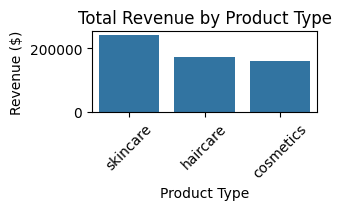

In [25]:
plt.subplot(4, 2, 1)
sns.barplot(x=revenue_by_product.index, y=revenue_by_product.values)
plt.title('Total Revenue by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)

([0, 1, 2],
 [Text(0, 0, 'haircare'), Text(1, 0, 'skincare'), Text(2, 0, 'cosmetics')])

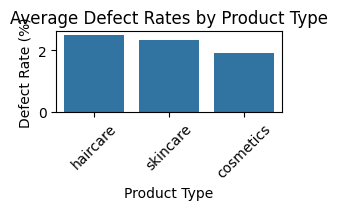

In [26]:

# Defect Rates by Product Type
plt.subplot(4, 2, 2)
sns.barplot(x=defect_by_product.index, y=defect_by_product.values)
plt.title('Average Defect Rates by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Defect Rate (%)')
plt.xticks(rotation=45)

([0, 1, 2],
 [Text(0, 0, 'Carrier C'), Text(1, 0, 'Carrier A'), Text(2, 0, 'Carrier B')])

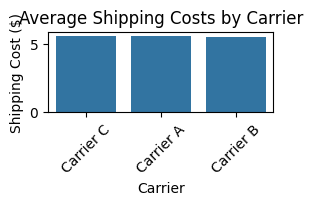

In [28]:
#  Shipping Costs by Carrier
plt.subplot(4, 2, 3)
sns.barplot(x=shipping_costs_carrier.index, y=shipping_costs_carrier.values)
plt.title('Average Shipping Costs by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Shipping Cost ($)')
plt.xticks(rotation=45)

([0, 1, 2, 3],
 [Text(0, 0, 'Air'),
  Text(1, 0, 'Road'),
  Text(2, 0, 'Rail'),
  Text(3, 0, 'Sea')])

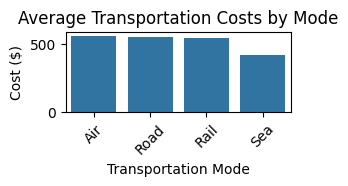

In [29]:
#  Transportation Costs by Mode
plt.subplot(4, 2, 4)
sns.barplot(x=transport_cost_mode.index, y=transport_cost_mode.values)
plt.title('Average Transportation Costs by Mode')
plt.xlabel('Transportation Mode')
plt.ylabel('Cost ($)')
plt.xticks(rotation=45)

([0, 1, 2, 3],
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'Female'),
  Text(2, 0, 'Male'),
  Text(3, 0, 'Non-binary')])

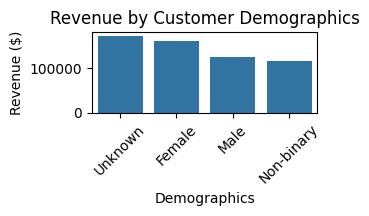

In [30]:
#  Revenue by Customer Demographics
plt.subplot(4, 2, 5)
sns.barplot(x=revenue_by_demographics.index, y=revenue_by_demographics.values)
plt.title('Revenue by Customer Demographics')
plt.xlabel('Demographics')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)